<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [10]:
import sqlite3
import pandas as pd
import os

# Check if the file exists
db_path = 'survey-results-public.sqlite'
if not os.path.exists(db_path):
    print("❌ Database file not found. Please make sure it's downloaded and in the current directory.")
else:
    print("✅ Database file found. Connecting...")

    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)

    # List all tables in the database
    query_tables = """
    SELECT name AS Table_Name 
    FROM sqlite_master 
    WHERE type='table'
    """
    tables_df = pd.read_sql_query(query_tables, conn)

    if tables_df.empty:
        print("⚠️ No tables found in the database.")
    else:
        print("📋 Tables found:")
        print(tables_df)

        # Get the first table name
        first_table_name = tables_df['Table_Name'].iloc[0]

        # Count the number of rows in that table
        query_count = f"SELECT COUNT(*) AS Row_Count FROM {first_table_name}"
        count_df = pd.read_sql_query(query_count, conn)

        print(f"\n🔢 Number of rows in the '{first_table_name}' table:")
        print(count_df)

✅ Database file found. Connecting...
⚠️ No tables found in the database.


#### Demo 2: List All Tables


In [11]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name


#### Demo 3: Group Data by Age


In [14]:
import sqlite3
import pandas as pd

# Step 1: Connect to the SQLite database
db_path = 'survey-results-public.sqlite'  # Make sure this file is in your working directory
conn = sqlite3.connect(db_path)

# Step 2: List all table names
query_tables = """
SELECT name AS Table_Name 
FROM sqlite_master 
WHERE type='table'
"""
tables_df = pd.read_sql_query(query_tables, conn)

# Check and display available tables
if tables_df.empty:
    print("⚠️ No tables found in the database.")
else:
    print("📋 Tables in the database:")
    print(tables_df)

    # Step 3: Use the first table name (or change this if needed)
    first_table_name = tables_df['Table_Name'].iloc[0]
    print(f"\n✅ Using table: {first_table_name}")

    # Step 4: Group data by Age
    query = f"""
    SELECT Age, COUNT(*) AS Count
    FROM {first_table_name}
    WHERE Age IS NOT NULL
    GROUP BY Age
    ORDER BY Age
    """
    df_age = pd.read_sql_query(query, conn)

    # Step 5: Display results
    print("\n👥 Count of respondents by Age:")
    print(df_age)

⚠️ No tables found in the database.


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [18]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("survey-results-public.sqlite")

# Show all table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables_df = pd.read_sql_query(query, conn)
print("Tables in the database:")
print(tables_df)

Tables in the database:
Empty DataFrame
Columns: [name]
Index: []


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


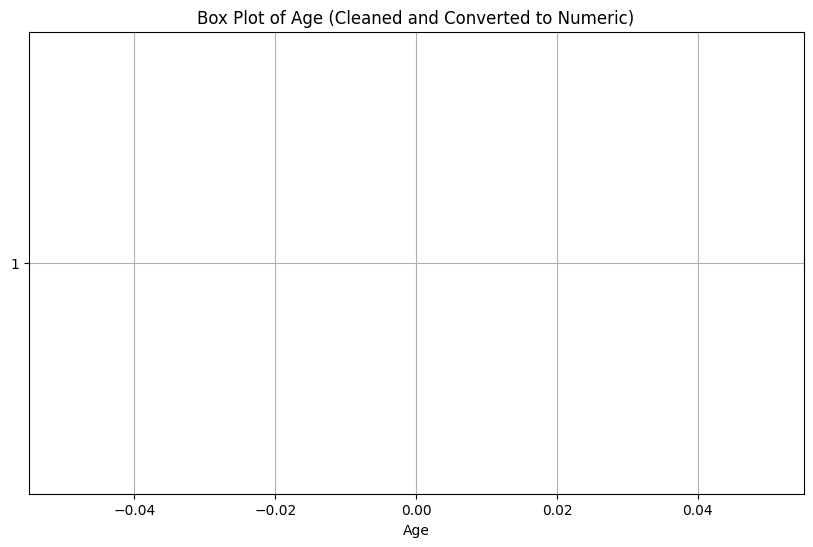

In [25]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query the Age column from the 'main' table
query = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""
df_age = pd.read_sql_query(query, conn)

# Step 3: Convert Age to numeric (in case of invalid entries)
df_age["Age"] = pd.to_numeric(df_age["Age"], errors="coerce")

# Drop missing or invalid entries
df_age = df_age.dropna()

# Step 4: Filter out unrealistic ages (e.g., under 10 or over 80)
df_age_clean = df_age[(df_age["Age"] >= 10) & (df_age["Age"] <= 80)]

# Step 5: Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_age_clean["Age"], vert=False)
plt.title("Box Plot of Age (Cleaned and Converted to Numeric)")
plt.xlabel("Age")
plt.grid(True)
plt.show()

# Step 6: Close the database connection
conn.close()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x600 with 0 Axes>

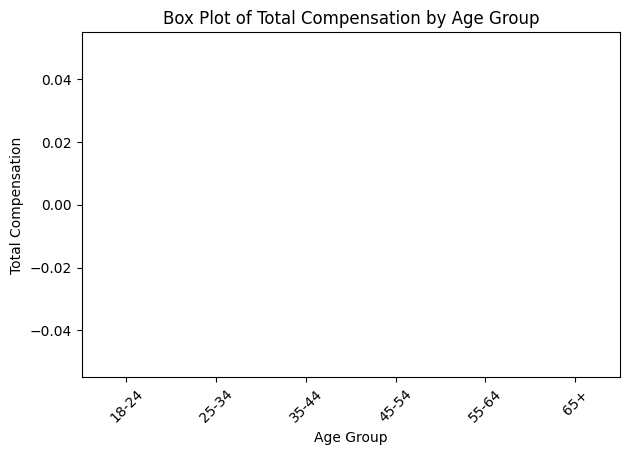

In [26]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the database
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query Age and CompTotal from the 'main' table
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Convert Age to numeric and drop invalid rows
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna()
df = df[(df['Age'] >= 18) & (df['Age'] <= 80)]
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]  # remove top 1% outliers

# Step 4: Create age group categories
age_bins = [18, 24, 34, 44, 54, 64, 80]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# Step 5: Plot box plot of CompTotal grouped by AgeGroup
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='AgeGroup', grid=False)
plt.title("Box Plot of Total Compensation by Age Group")
plt.suptitle("")  # Remove default title
plt.xlabel("Age Group")
plt.ylabel("Total Compensation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Close connection
conn.close()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

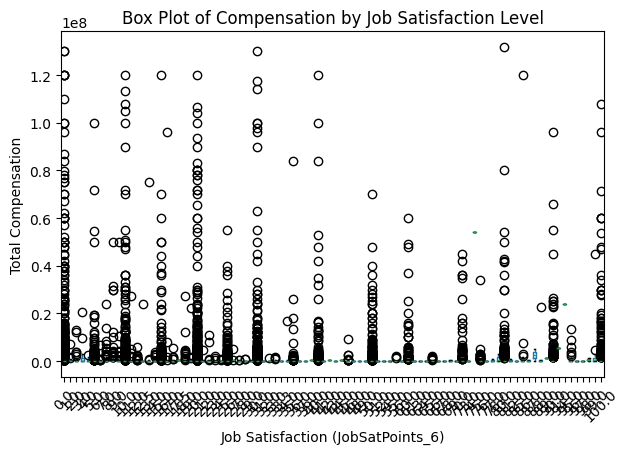

In [27]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the database
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query JobSatPoints_6 and CompTotal from the 'main' table
query = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Convert values to numeric (if needed)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna()
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]  # remove top 1% outliers

# Step 4: Clean satisfaction labels (optional: map to more readable labels)
# If needed, define custom labels like:
# df['JobSatPoints_6'] = df['JobSatPoints_6'].map({
#     '1': 'Very Dissatisfied',
#     '2': 'Dissatisfied',
#     '3': 'Neutral',
#     '4': 'Satisfied',
#     '5': 'Very Satisfied'
# })

# Step 5: Create the box plot
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='JobSatPoints_6', grid=False)
plt.title("Box Plot of Compensation by Job Satisfaction Level")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Job Satisfaction (JobSatPoints_6)")
plt.ylabel("Total Compensation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Close connection
conn.close()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


C:\Users\rahim\AppData\Local\Temp\ipykernel_8900\418911829.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['ConvertedCompYearly'] = pd.to_numeric(df_top5['ConvertedCompYearly'], errors='coerce')


<Figure size 1200x600 with 0 Axes>

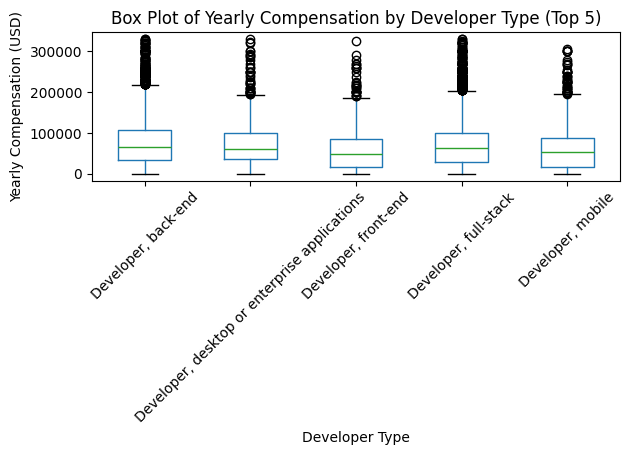

In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query DevType and ConvertedCompYearly from the main table
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Handle multiple developer types per person (split on ';')
df['DevType'] = df['DevType'].str.split(';')
df = df.explode('DevType')
df['DevType'] = df['DevType'].str.strip()  # Remove extra whitespace

# Step 4: Find top 5 most common DevType values
top_5_devtypes = df['DevType'].value_counts().nlargest(5).index.tolist()

# Step 5: Filter to only the top 5
df_top5 = df[df['DevType'].isin(top_5_devtypes)]

# Step 6: Convert compensation to numeric and drop top 1% outliers
df_top5['ConvertedCompYearly'] = pd.to_numeric(df_top5['ConvertedCompYearly'], errors='coerce')
df_top5 = df_top5.dropna()
df_top5 = df_top5[df_top5['ConvertedCompYearly'] < df_top5['ConvertedCompYearly'].quantile(0.99)]

# Step 7: Plot the box plot
plt.figure(figsize=(12, 6))
df_top5.boxplot(column='ConvertedCompYearly', by='DevType', grid=False)
plt.title("Box Plot of Yearly Compensation by Developer Type (Top 5)")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Developer Type")
plt.ylabel("Yearly Compensation (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Close the connection
conn.close()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x600 with 0 Axes>

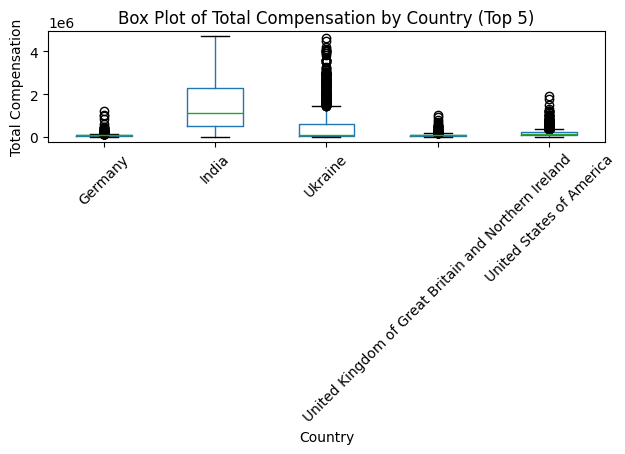

In [31]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the database
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query Country and CompTotal
query = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna()

# Step 4: Get top 5 countries by count
top_5_countries = df['Country'].value_counts().nlargest(5).index.tolist()

# Step 5: Filter to only those countries
df_top5 = df[df['Country'].isin(top_5_countries)]

# Step 6: Remove top 1% outliers
df_top5 = df_top5[df_top5['CompTotal'] < df_top5['CompTotal'].quantile(0.99)]

# Step 7: Plot the box plot
plt.figure(figsize=(12, 6))
df_top5.boxplot(column='CompTotal', by='Country', grid=False)
plt.title("Box Plot of Total Compensation by Country (Top 5)")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Country")
plt.ylabel("Total Compensation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Close DB connection
conn.close()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


C:\Users\rahim\AppData\Local\Temp\ipykernel_8900\2763857352.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

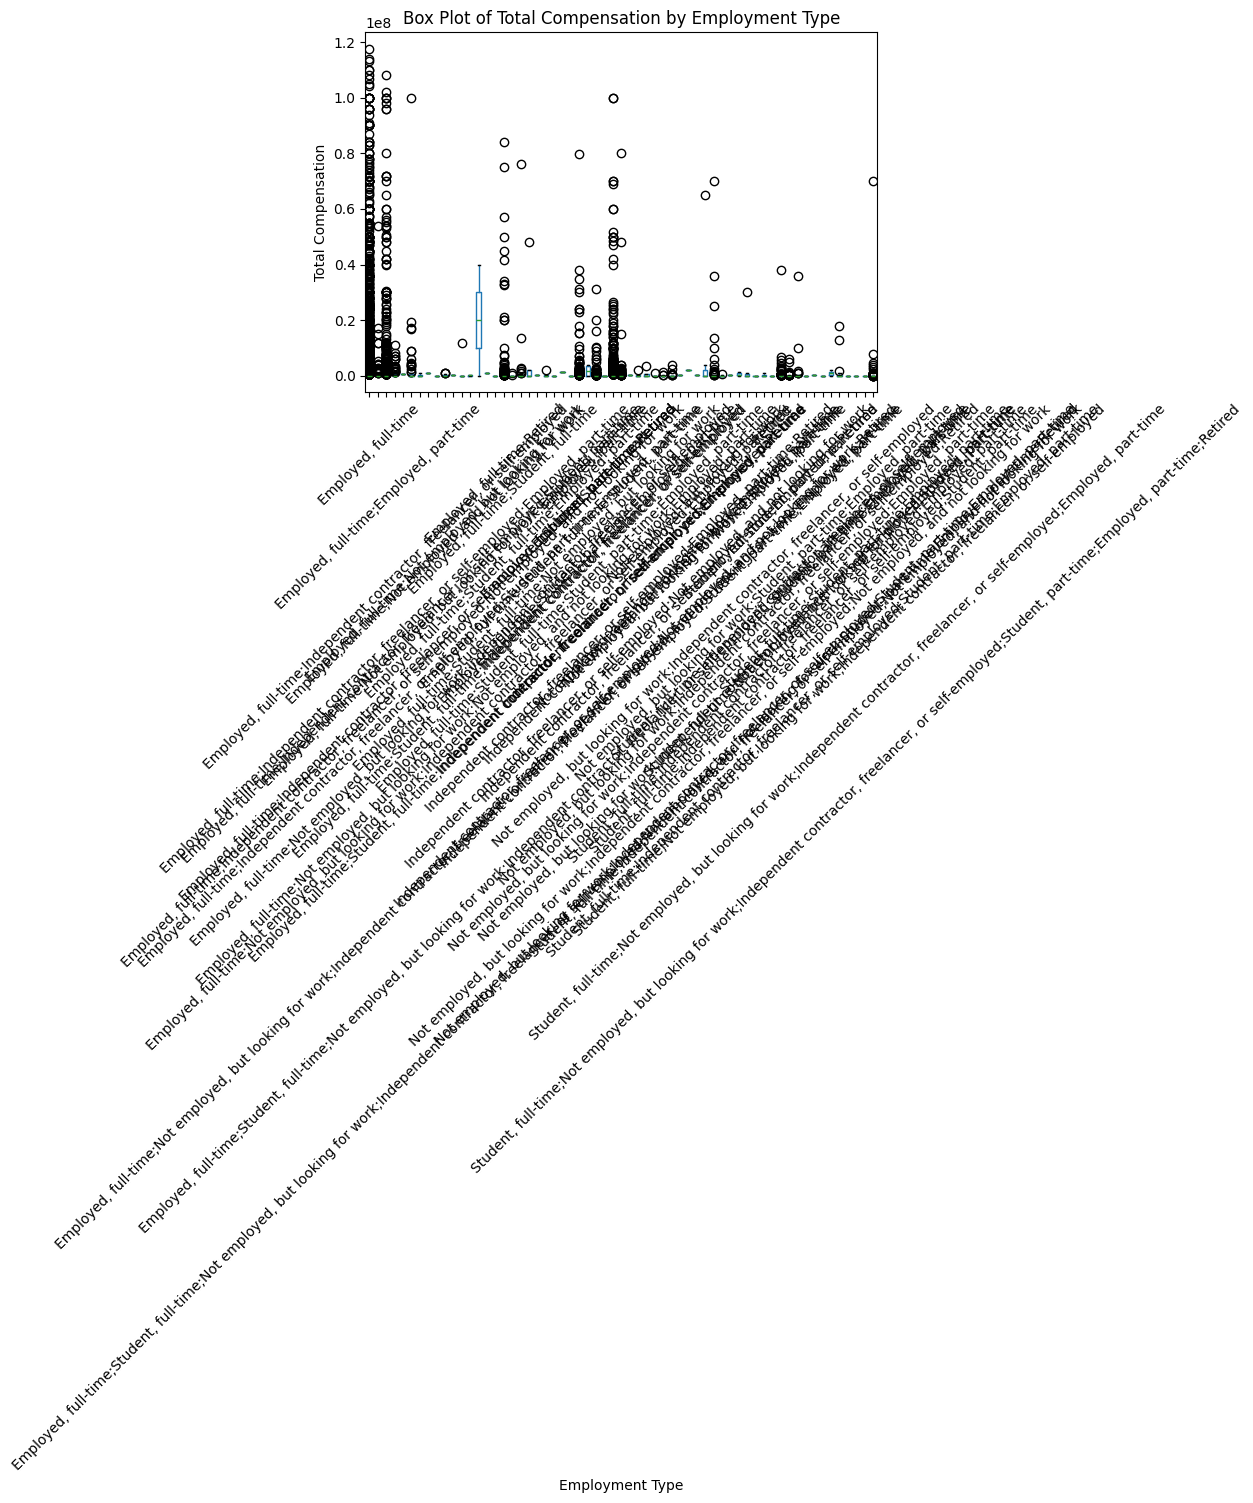

In [32]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the database
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query Employment and CompTotal
query = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Clean and convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna()

# Step 4: Optional – remove top 1% outliers
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]

# Step 5: Plot the box plot
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='Employment', grid=False)
plt.title("Box Plot of Total Compensation by Employment Type")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Employment Type")
plt.ylabel("Total Compensation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Close DB connection
conn.close()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

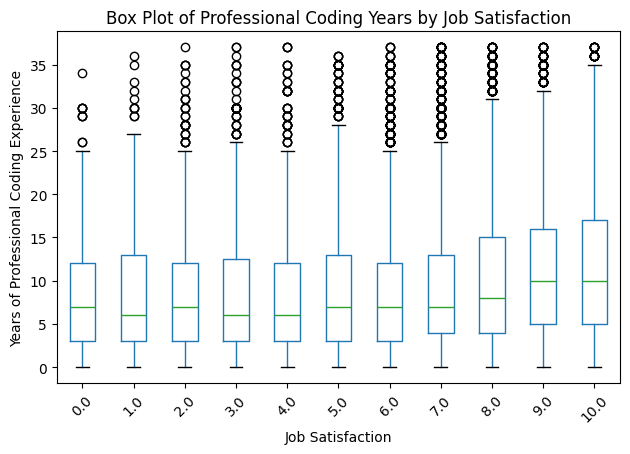

In [33]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query YearsCodePro and JobSat
query = """
SELECT YearsCodePro, JobSat
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Clean and convert YearsCodePro to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df = df.dropna()

# Optional: Remove top 1% outliers
df = df[df['YearsCodePro'] < df['YearsCodePro'].quantile(0.99)]

# Step 4: Plot the box plot
plt.figure(figsize=(12, 6))
df.boxplot(column='YearsCodePro', by='JobSat', grid=False)
plt.title("Box Plot of Professional Coding Years by Job Satisfaction")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Job Satisfaction")
plt.ylabel("Years of Professional Coding Experience")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Close connection
conn.close()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [34]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
